같은 상품을 새로운 고객에게 마케팅 하려고한다.
연령과 상품가입여부, 직업을 함께 고려할때 마케팅 전략을 변화시켜야 할 그룹은?

In [2]:
import pandas as pd
from pandas import Series
from pandas import DataFrame
import matplotlib.pyplot as plt

In [3]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False

In [6]:

df=pd.read_csv(r'bank-additional-full.csv',engine='python',sep=';')

In [7]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [9]:
df.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
df.shape

(41188, 21)

In [14]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [16]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [17]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [18]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [19]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [20]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

# 데이터 시각화

In [21]:
df['age']

0        56
1        57
2        37
3        40
4        56
         ..
41183    73
41184    46
41185    56
41186    44
41187    74
Name: age, Length: 41188, dtype: int64

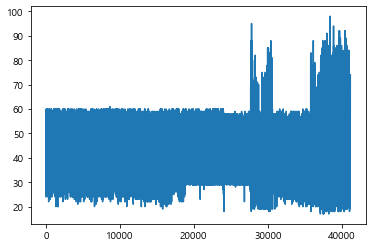

In [22]:
df['age'].plot()
plt.show()

In [23]:
age=df['age'].sort_values()

In [24]:
age

38274    17
37579    17
37539    17
37140    17
37558    17
         ..
40450    92
38921    94
27826    95
38455    98
38452    98
Name: age, Length: 41188, dtype: int64

In [32]:
age=age.reset_index()

In [33]:
age

,index,age
0,0,17
1,1,17
2,2,17
3,3,17
4,4,17
...,...,...
41183,41183,92
41184,41184,94
41185,41185,95
41186,41186,98


In [34]:
age=age.drop('index',axis=1)
age

,age
0,17
1,17
2,17
3,17
4,17
...,...
41183,92
41184,94
41185,95
41186,98


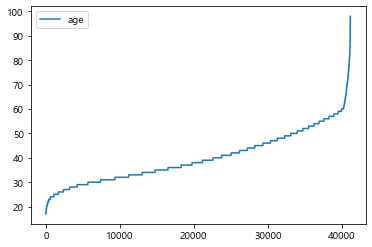

In [35]:
age.plot()
plt.show()

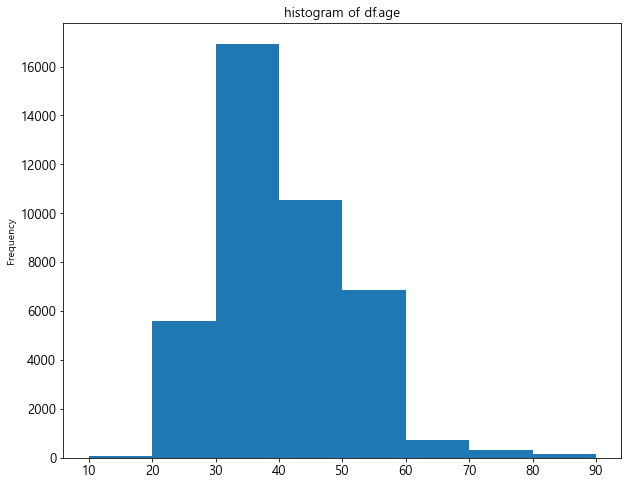

In [37]:
df['age'].plot.hist(bins=range(10,100,10),figsize=[10,8])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('histogram of df.age',fontsize=13)
plt.show()

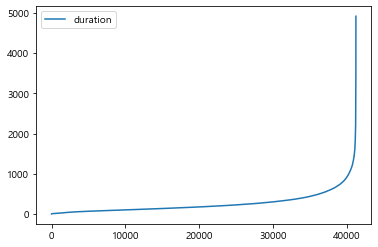

In [38]:
# duration 전화통화시간 선 그래프 시각화
(((df['duration'].sort_values()).reset_index()).drop('index',axis=1)).plot()
plt.show()

In [40]:
df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

<AxesSubplot:ylabel='Frequency'>

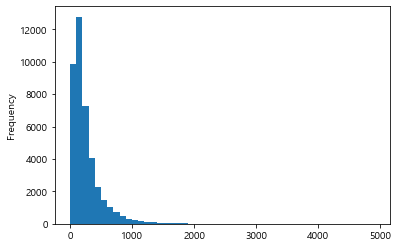

In [42]:
df['duration'].plot.hist(bins=range(0,5000,100))

대출이 있는 사람이라면 은행 상품에 잘 가입하지 않을 것이다

In [43]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [46]:
grouped=df.groupby('y')

In [47]:
yes_group=grouped.get_group('yes')#y 칼럼이 yes 인 데이터 프레임 추출, 가입한 사람
no_group=grouped.get_group('no')

In [48]:
yes_group

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [49]:
no_group

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [50]:
yes=yes_group['loan'].value_counts()

In [52]:
yes

no         3850
yes         683
unknown     107
Name: loan, dtype: int64

In [53]:
no=no_group['loan'].value_counts()

In [54]:
no

no         30100
yes         5565
unknown      883
Name: loan, dtype: int64

은행을 가입한 사람들 중 대출이 있는 사람과 없는 사람 그리고 은행을 가입하지 않은 사람들 중 대출이 있는 사람과 없는 사람을 골라낸다

In [60]:
yes=yes/yes.sum()#가입한 그룹 내에서 대출이 있는 사람의 비중과 가입하지 않은 그룹 내 대출이 있는 사람의 비중을 비교하기 위함

In [57]:
no=no/no.sum()

In [58]:
yes

no         0.829741
yes        0.147198
unknown    0.023060
Name: loan, dtype: float64

In [59]:
no

no         0.823574
yes        0.152266
unknown    0.024160
Name: loan, dtype: float64

In [61]:
pd.concat([yes,no],axis=1)

,loan,loan
no,0.829741,0.823574
yes,0.147198,0.152266
unknown,0.023060,0.024160


In [62]:
#시리즈 이름 설정, loan이라는 컬럼명이 겹치기 때문이다
yes.name='y_yes'

In [63]:
no.name='y_no'

In [64]:
pd.concat([yes,no],axis=1)

,y_yes,y_no
no,0.829741,0.823574
yes,0.147198,0.152266
unknown,0.023060,0.024160


가입한 그룹의 대출 비중이 가입하지 않은 그룹 모다 0.005 더 적다. 

같은 상품을 새로운 고객에게 마케팅 하려고한다.
연령과 상품가입여부, 직업을 함께 고려할때 마케팅 전략을 변화시켜야 할 그룹은?


In [66]:
pd.pivot_table(df,values='age',index='y',columns='job',aggfunc='mean')

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054


In [67]:
pd.pivot_table(df,'age','y','job',aggfunc='mean')

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054


In [68]:
pd.pivot_table(df,'age',['y','marital'],'job',aggfunc='mean')

job              admin.  blue-collar  entrepreneur  housemaid  management  \
y   marital                                                                 
no  divorced  43.098432    42.903704     44.042424  48.806897   46.123288   
    married   40.148663    40.857804     42.477111  44.849218   43.634997   
    single    33.858265    33.409255     35.472527  38.087379   34.070776   
    unknown   34.666667    42.818182     35.500000  40.000000   51.000000   
yes divorced  44.878788    42.037736     44.857143  57.000000   46.692308   
    married   41.386503    41.363420     43.090909  54.256757   44.756637   
    single    32.404594    32.652174     35.666667  40.875000   33.285714   
    unknown   42.500000    37.000000     31.000000        NaN         NaN   

job             retired  self-employed   services    student  technician  \
y   marital                                                                
no  divorced  61.480469      42.871795  41.991984  34.500000   42.173484   
    married   60.019048      42.349148  39.992951  30.484848   40.686245   
    single    53.938272      33.783537  32.159921  26.062500   33.950697   
    unknown   59.750000      39.400000  40.000000  30.000000   33.300000   
yes divorced  72.739130      41.875000  43.484848  35.666667   40.738462   
    married   67.033435      41.036585  38.379518  31.250000   41.398438   
    single    67.500000      31.921569  31.024194  24.481061   32.078853   
    unknown   66.000000            NaN        NaN        NaN   30.000000   

job           unemployed    unknown  
y   marital                          
no  divorced   42.140351  43.300000  
    married    41.636861  47.532110  
    single     33.536946  38.288136  
    unknown    47.200000  40.166667  
yes divorced   47.900000  76.333333  
    married    41.941860  58.750000  
    single     32.062500  30.000000  
    unknown          NaN  40.666667

In [69]:
pd.pivot_table(df,'age',['y','marital'],['job','contact'],aggfunc='mean')

job              admin.            blue-collar            entrepreneur  \
contact        cellular  telephone    cellular  telephone     cellular   
y   marital                                                              
no  divorced  43.143639  43.019185   42.906907  42.900585    43.301887   
    married   40.349554  39.800357   41.182477  40.494249    42.213628   
    single    33.515821  34.646707   32.872838  34.183554    36.181034   
    unknown   35.000000  31.000000   43.800000  42.000000    40.000000   
yes divorced  45.028302  44.269231   41.500000  43.400000    45.333333   
    married   41.362832  41.540230   41.682432  40.608000    44.177419   
    single    32.117284  34.150000   31.934426  34.897436    35.117647   
    unknown   42.500000        NaN   37.000000        NaN    31.000000   

job                      housemaid            management             ...  \
contact       telephone   cellular  telephone   cellular  telephone  ...   
y   marital                                                          ...   
no  divorced  45.372881  48.292683  49.476190  44.786164  47.721805  ...   
    married   42.802273  45.900966  43.342561  43.740678  43.452416  ...   
    single    34.227273  36.827586  39.711111  33.747405  34.697987  ...   
    unknown   31.000000  40.000000        NaN        NaN  51.000000  ...   
yes divorced  44.000000  59.857143  37.000000  46.297297  54.000000  ...   
    married   40.500000  55.375000  50.777778  45.401099  42.090909  ...   
    single    38.000000  40.769231  41.333333  32.763636  36.875000  ...   
    unknown         NaN        NaN        NaN        NaN        NaN  ...   

job            services               student            technician  \
contact        cellular  telephone   cellular  telephone   cellular   
y   marital                                                           
no  divorced  42.028269  41.944444  36.000000  27.000000  42.069034   
    married   40.483733  39.395833  32.150000  27.923077  40.283568   
    single    32.360927  31.863081  25.396509  27.742138  33.529248   
    unknown   34.500000  42.750000  30.000000        NaN  30.285714   
yes divorced  43.083333  44.555556  35.666667        NaN  40.701754   
    married   38.634921  37.575000  30.333333  34.000000  41.299065   
    single    30.846154  31.950000  24.174468  26.965517  31.995902   
    unknown         NaN        NaN        NaN        NaN  30.000000   

job                     unemployed               unknown             
contact       telephone   cellular  telephone   cellular  telephone  
y   marital                                                          
no  divorced  42.435644  42.253731  41.978723  46.000000  40.600000  
    married   41.365495  41.452769  41.871369  48.349057  46.758929  
    single    35.008741  33.252101  33.940476  39.535714  37.161290  
    unknown   40.333333  46.500000  50.000000  48.333333  32.000000  
yes divorced  41.000000  51.000000  40.666667  76.333333        NaN  
    married   41.904762  42.746479  38.133333  58.181818  60.000000  
    single    32.657143  32.355556  27.666667  31.000000  28.000000  
    unknown         NaN        NaN        NaN  45.000000  32.000000  

[8 rows x 24 columns]

In [70]:
pd.pivot_table(df,'age',['y','marital'],['job','contact'],aggfunc='mean',fill_value=0)#결측치 대체

job              admin.            blue-collar            entrepreneur  \
contact        cellular  telephone    cellular  telephone     cellular   
y   marital                                                              
no  divorced  43.143639  43.019185   42.906907  42.900585    43.301887   
    married   40.349554  39.800357   41.182477  40.494249    42.213628   
    single    33.515821  34.646707   32.872838  34.183554    36.181034   
    unknown   35.000000  31.000000   43.800000  42.000000    40.000000   
yes divorced  45.028302  44.269231   41.500000  43.400000    45.333333   
    married   41.362832  41.540230   41.682432  40.608000    44.177419   
    single    32.117284  34.150000   31.934426  34.897436    35.117647   
    unknown   42.500000   0.000000   37.000000   0.000000    31.000000   

job                      housemaid            management             ...  \
contact       telephone   cellular  telephone   cellular  telephone  ...   
y   marital                                                          ...   
no  divorced  45.372881  48.292683  49.476190  44.786164  47.721805  ...   
    married   42.802273  45.900966  43.342561  43.740678  43.452416  ...   
    single    34.227273  36.827586  39.711111  33.747405  34.697987  ...   
    unknown   31.000000  40.000000   0.000000   0.000000  51.000000  ...   
yes divorced  44.000000  59.857143  37.000000  46.297297  54.000000  ...   
    married   40.500000  55.375000  50.777778  45.401099  42.090909  ...   
    single    38.000000  40.769231  41.333333  32.763636  36.875000  ...   
    unknown    0.000000   0.000000   0.000000   0.000000   0.000000  ...   

job            services               student            technician  \
contact        cellular  telephone   cellular  telephone   cellular   
y   marital                                                           
no  divorced  42.028269  41.944444  36.000000  27.000000  42.069034   
    married   40.483733  39.395833  32.150000  27.923077  40.283568   
    single    32.360927  31.863081  25.396509  27.742138  33.529248   
    unknown   34.500000  42.750000  30.000000   0.000000  30.285714   
yes divorced  43.083333  44.555556  35.666667   0.000000  40.701754   
    married   38.634921  37.575000  30.333333  34.000000  41.299065   
    single    30.846154  31.950000  24.174468  26.965517  31.995902   
    unknown    0.000000   0.000000   0.000000   0.000000  30.000000   

job                     unemployed               unknown             
contact       telephone   cellular  telephone   cellular  telephone  
y   marital                                                          
no  divorced  42.435644  42.253731  41.978723  46.000000  40.600000  
    married   41.365495  41.452769  41.871369  48.349057  46.758929  
    single    35.008741  33.252101  33.940476  39.535714  37.161290  
    unknown   40.333333  46.500000  50.000000  48.333333  32.000000  
yes divorced  41.000000  51.000000  40.666667  76.333333   0.000000  
    married   41.904762  42.746479  38.133333  58.181818  60.000000  
    single    32.657143  32.355556  27.666667  31.000000  28.000000  
    unknown    0.000000   0.000000   0.000000  45.000000  32.000000  

[8 rows x 24 columns]

In [71]:
pivot=pd.pivot_table(df,values='age',index='y',columns='job',aggfunc='mean')

In [72]:
pivot

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054


In [74]:
pivot.loc['diff']=pivot.loc['yes']-pivot.loc['no']

In [75]:
pivot

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054
diff,-0.250911,-0.381430,0.232030,7.945493,0.473829,8.327329,-2.170175,-2.012836,-1.596667,-0.853458,-0.782328,1.678627


In [78]:
result=pivot.sort_values('diff',axis=1,ascending=False)

In [79]:
result

job,retired,housemaid,unknown,management,entrepreneur,admin.,blue-collar,unemployed,technician,student,services,self-employed
y,,,,,,,,,,,,
no,59.926128,44.705451,45.375427,42.309707,41.703453,38.219846,39.582057,39.844828,38.600033,26.396667,38.090236,40.176887
yes,68.253456,52.650943,47.054054,42.783537,41.935484,37.968935,39.200627,39.062500,37.746575,24.800000,36.077399,38.006711
diff,8.327329,7.945493,1.678627,0.473829,0.232030,-0.250911,-0.381430,-0.782328,-0.853458,-1.596667,-2.012836,-2.170175


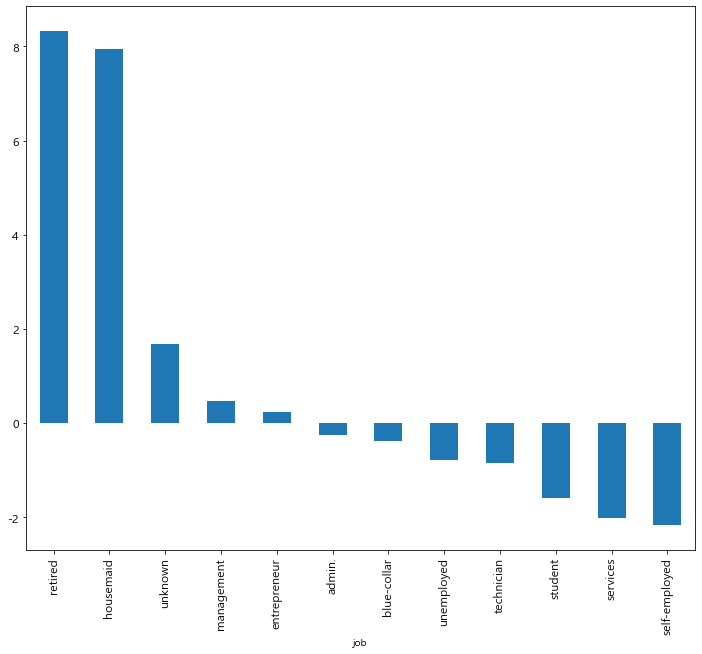

In [80]:
result.loc['diff'].plot.bar(figsize=[12,10])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()